# Decisin tree classification

In [1]:
#To classify the type of drug
import pandas as pd
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [2]:
X=df[df.columns[:-1]].values
Y=df["Drug"]# or df[df.columns[-17]]
# X

In [3]:
# Preprocessing the data
#Coverting the categorical variables to numerical values as sklearn decision trees
#do not handle categorical values

#First identifying which values are categorical
# print(df.head())

# df.dtypes
#So it can be seen that Sex, BP, Cholesterol are the categorical independent variable 
# their indices are 1,2,3 respectively

In [4]:
#### Converting categorical varibales to numerical varibles(numpy arrays) to work with sklearn decision trees

In [5]:
# narray=list(set(df["Sex"].tolist()))
# print(type(narray))
# narray

In [6]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(df["Sex"].unique().tolist())
X[:,1]=le_sex.transform(X[:,1])
X[:,1]

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0], dtype=object)

In [7]:
#Converting BP column
le_BP=preprocessing.LabelEncoder()
le_BP.fit(list(set(df["BP"].tolist())))
X[:,2]=le_BP.transform(X[:,2])
X[:,2]

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1], dtype=object)

In [8]:
#Coverting cholesterol column to numerical values
le_chol=preprocessing.LabelEncoder()
le_chol.fit(list(set(df["Cholesterol"].tolist())))
X[:,3]=le_chol.transform(X[:,3])
X[:,3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=object)

### DecisionTreeRegressor

In [10]:
#Gives the same accuracy as DecisionTreeClassifier

# #Coverting cholesterol column to numerical values
# le_drug=preprocessing.LabelEncoder()
# le_drug.fit(Y.unique().tolist())
# Y=le_drug.transform(Y)
# Y

# #Modeling 
# # from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
# drugTree=DecisionTreeRegressor()
# # drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=None)#max_depth=None
# #nodes are expanded until all leaves are pure
# drugTree.fit(X_train,Y_train)  # Training the model
# predTree=drugTree.predict(X_test)  # Making predictions
# predTree[0:5]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

### DecisionTreeClassifier

In [13]:
#Modeling 
from sklearn.tree import DecisionTreeClassifier
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=None)#  ex: max_depth=4 || =None
#nodes are expanded until all leaves are pure
drugTree.fit(X_train,Y_train)  # Training the model
predTree=drugTree.predict(X_test)  # Making predictions
predTree[0:5]

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC'], dtype=object)

In [14]:
#Accuracy evaluation
from sklearn.metrics import accuracy_score
print("Accuracy score of decision tree is : ",accuracy_score(Y_test,predTree))

Accuracy score of decision tree is :  0.95


In [19]:
# !pip install pydotplus
# !pip install graphviz

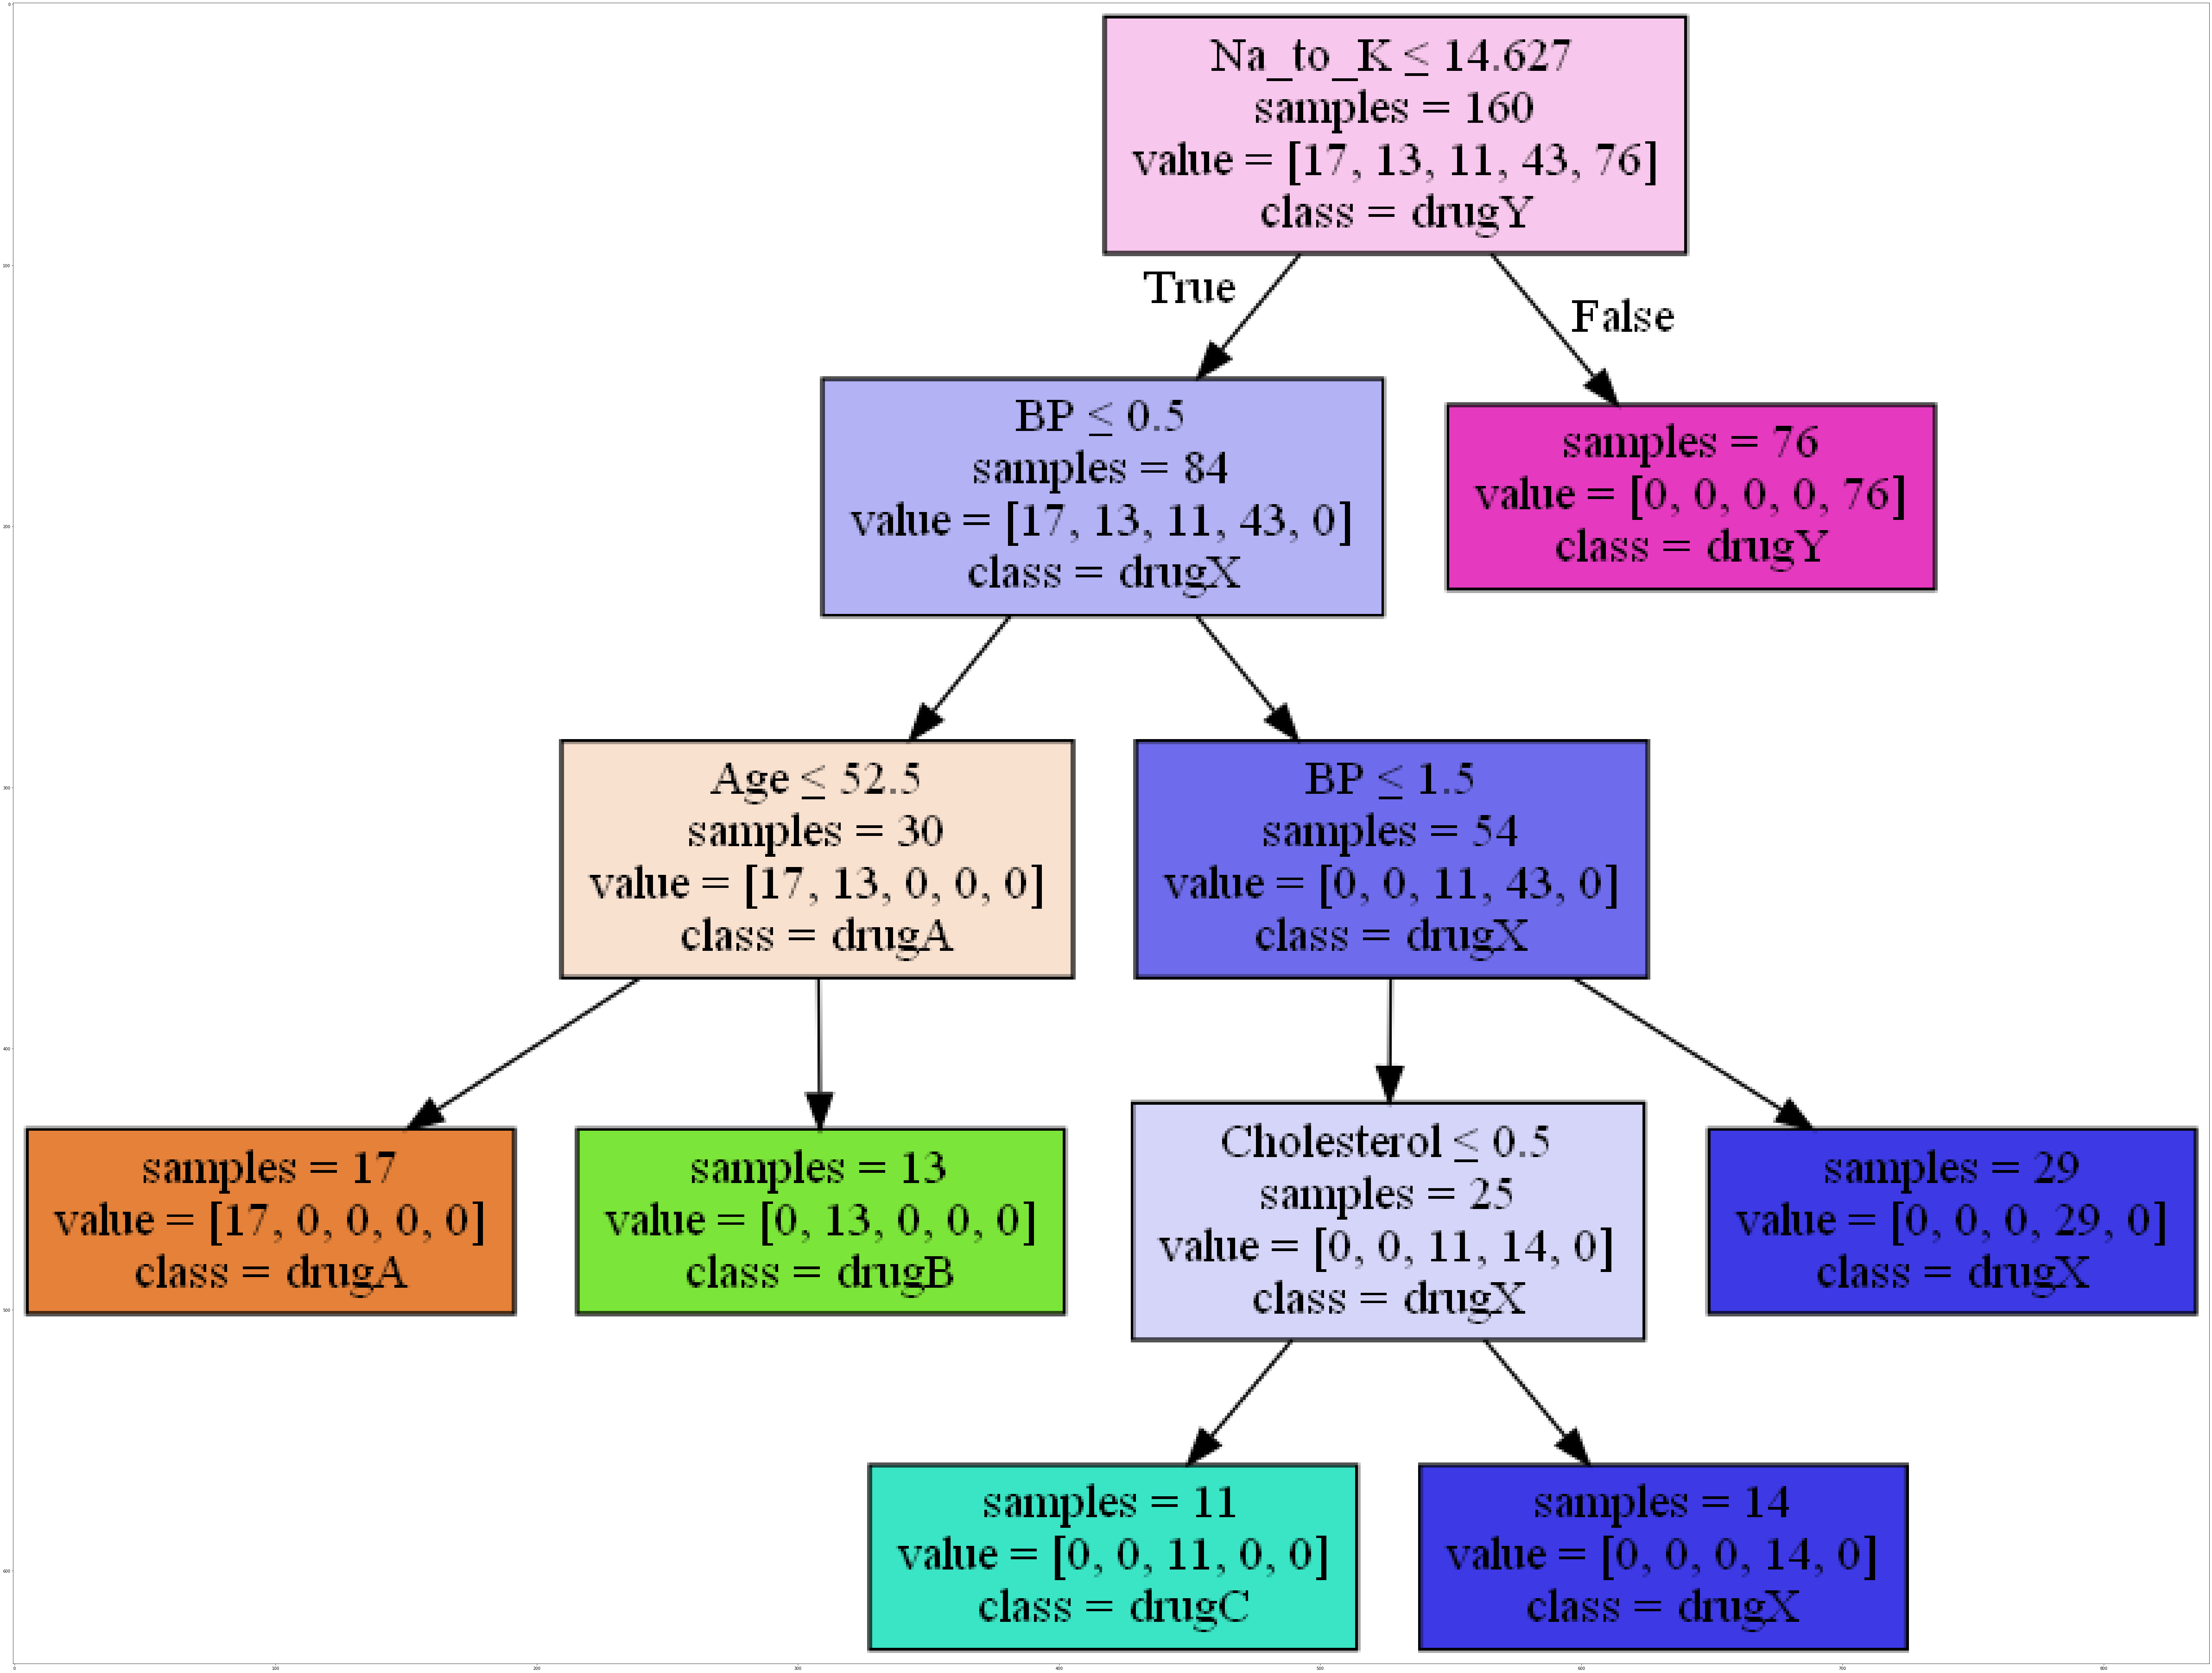

In [18]:
#Visualizing decision tree
import numpy as np
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
dot_data=StringIO()
# filename="drugTreeRegression.png"
filename="drugTree.png"
featureNames=df.columns[0:5]
targetNames=df["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,
                         out_file=dot_data,
                        feature_names=featureNames,
                        class_names=np.unique(Y_train),
                        filled=True,
                        special_characters=True,
                        rotate=False,
                        impurity=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100,200))
plt.imshow(img,interpolation="nearest")